# House Price Prediction Classification

## Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Dataset

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv',encoding='latin-1')

In [3]:
df.shape

(13320, 9)

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [5]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17


## Data analysis and cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


In [7]:
df.describe()

,bath,balcony
count,13247.000000,12711.000000
mean,2.692610,1.584376
std,1.341458,0.817263
min,1.000000,0.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,2.000000
max,40.000000,3.000000


### Target Field (Price)

In [8]:
df_1 = df.copy()

    There are differnt value in the price field lets view the values which are of different so we can handle or drop 
    the values accordingly

In [9]:
def price_error_checker(x):
    try:
        if float(x):
            return True
    except:
        return False

In [10]:
Price_error = df_1[~df_1['price'].apply(price_error_checker)]
print("Total error values",len(Price_error))

Total error values 338


In [11]:
print("Currenct symbol error              :", list(Price_error.iloc[0:5,-1]))
print("Question symbol error              :", list(Price_error.iloc[25:30,-1]))
print(r"Prefix with '\x80'                 :", list(Price_error.iloc[230:235,-1]))
print("Price is in the form of range      :", list(Price_error.iloc[66:67,-1]))

Currenct symbol error              : [' $39.07 ', ' $120.00 ', ' $62.00 ', ' $95.00 ', ' $51.00 ']
Question symbol error              : [' ? 105.00 ', ' ? 224.50 ', ' ? 78.00 ', ' ? 60.80 ', ' ? 102.00 ']
Prefix with '\x80'                 : ['\x80 45.60', '\x80 63.00', '\x80 280.00', '\x80 46.90', '\x80 75.00']
Price is in the form of range      : [' 200-250 ']


    We can see some values are in dollars, question mark, symbol(\x80) or in range.
    So lets handle them first and the we can type cast the column to float

In [12]:
def price_error_solver(x):
    try:
        if float(x):
            return x
    except:
        if "$" in x:
            return float(x.split("$")[1])
        elif "?" in x:
            return float(x.split("?")[1])
        elif x.startswith('\x80'):
            return float(x.split()[1])
        else:
            split_values = x.split('-')
            return float((float(split_values[0])+float(split_values[1]))/2)

In [13]:
df_1['price'] = df_1['price'].apply(price_error_solver)
df_1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.0


In [14]:
df_1['price'] = pd.to_numeric(df_1['price'])

In [15]:
Price_List = list(df_1['price'])
Price_List.sort(reverse=True)
print(Price_List[:10])

[42278.0, 3600.0, 2912.0, 2800.0, 2736.0, 2700.0, 2600.0, 2600.0, 2340.0, 2250.0]


    Beacuse of this single outlier value we could not visualize data. So lets remove the record.

In [16]:
df_1 = df_1[df_1['price']<3000]

### Null values analyzing

In [17]:
df_null = pd.DataFrame()

In [18]:
df_null['Fields'] = df.columns

In [19]:
df_null['Null_counts'] = [df.isnull().sum()[i] for i in range(len(df.columns))]

In [20]:
df_null['Null %'] = [round((df.isnull().sum()[i]/len(df))*100,2) for i in range(len(df.columns))]

In [21]:
df_null

,Fields,Null_counts,Null %
0,area_type,0,0.00
1,availability,0,0.00
2,location,1,0.01
3,size,16,0.12
4,society,5502,41.31
5,total_sqft,0,0.00
6,bath,73,0.55
7,balcony,609,4.57
8,price,0,0.00


### Handling null values

In [22]:
df_2 = df_1.copy()

#### Society

    In this field nearly 40% of the data is null so it will be much better to drop this column.

In [23]:
df_2.drop(['society'],axis=1,inplace=True)

In [24]:
df_2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


#### Bath, Location , Size

    These fields have less than 1% of null data in them. So we can drop these rows from the dataset.

In [25]:
df_2.dropna(subset=['bath','location','size'],inplace=True)

In [26]:
df_2.shape

(13244, 8)

#### Balcony

    In Balcony field the null data is 4% here we can impute the data.

In [27]:
df_2['balcony'].value_counts()

2.0    5112
1.0    4897
3.0    1671
0.0    1029
Name: balcony, dtype: int64

    Even though the field is of float datatype the values are of 0,1,2,3 which is ordinal data type so we can use mode which will be effective rather mean or median

In [28]:
df_2['balcony'].fillna(df_2['balcony'].mode()[0],inplace=True)

In [29]:
df_2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

    All the null values are handled in the dataset so we can further analyze each field one by one and further make the modification as required

### Indepth analysing of each fields

In [30]:
df_3 = df_2.copy()

#### 1 Area Type

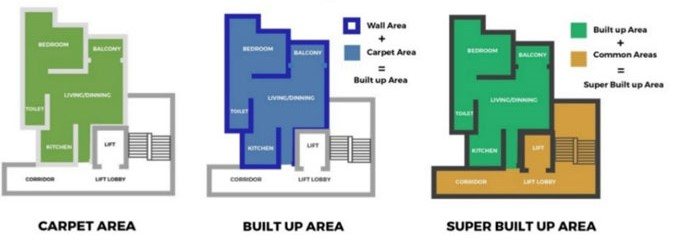

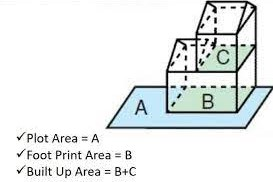

In [31]:
df_3['area_type'].value_counts()

Super built-up  Area    8739
Built-up  Area          2410
Plot  Area              2008
Carpet  Area              87
Name: area_type, dtype: int64

    From the above images it is clear the area type is different aspects of a place. It does not indicate different 
    categories so this field can be dropped from the dataset for further analysis

In [32]:
df_3.drop(['area_type'],axis=1,inplace=True)

#### 2 Availability

In [33]:
df_3['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun', '17-Feb',
       '20-Nov', '20-Jul', '16-Sep', '15-Oct', '20-Feb', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [34]:
df_3['availability'] = np.where(df_3['availability']!='Ready To Move','Available Later',df_3['availability'])

In [35]:
df_3['availability'].value_counts()

Ready To Move      10562
Available Later     2682
Name: availability, dtype: int64

In [36]:
df_g = df_3.groupby(['availability'])['price'].agg(['mean','min','max']).reset_index()

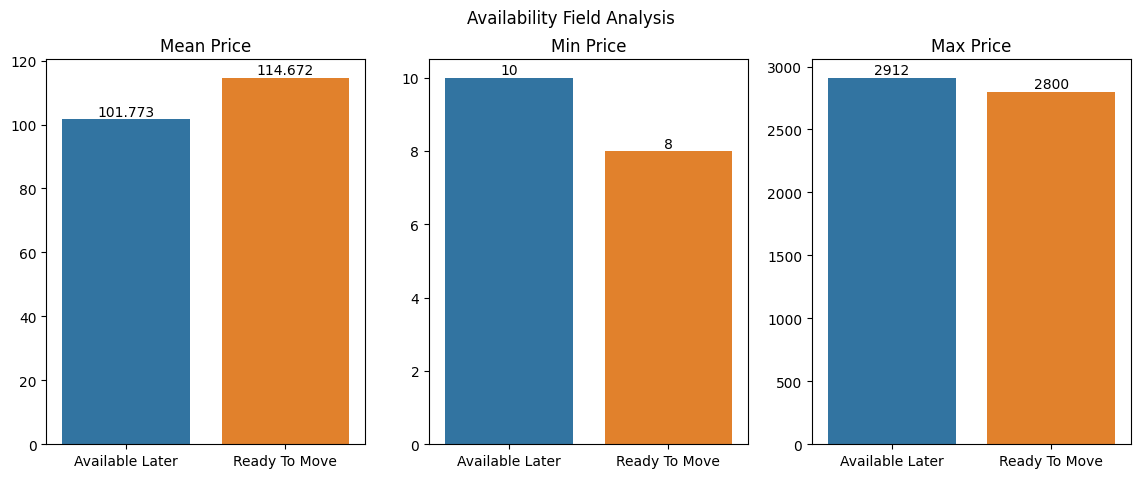

In [37]:
plt.subplots(1,3,figsize=(14,5))


plt.suptitle("Availability Field Analysis")

plt.subplot(1,3,1)
ax_1 = sns.barplot(data=df_g,x='availability',y='mean')
ax_1.bar_label(ax_1.containers[0])
plt.title("Mean Price")
plt.xlabel("")
plt.ylabel("")

plt.subplot(1,3,2)
ax_2 = sns.barplot(data=df_g,x='availability',y='min')
ax_2.bar_label(ax_2.containers[0])
plt.title("Min Price")
plt.xlabel("")
plt.ylabel("")


plt.subplot(1,3,3)
ax_3 = sns.barplot(data=df_g,x='availability',y='max')
ax_3.bar_label(ax_3.containers[0])
plt.title("Max Price")
plt.xlabel("")
plt.ylabel("")


plt.show()

#### Inference from availability
    -The mean and the max value of the price is very high when comparing the availability.
    -The price of house that is available now is almost 18 rs more on average comparing the house that is available later.
    -Even from the max value we can infer there is nearly 100+ rs difference. Even at min price it is low by only 2 
    which might be a outlier

#### 3 Size

In [38]:
df_3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

     Some values are mentioned in BHK and some are mentioned in Bedroom so we can retrieve the number part alone
     from the data and convert the column into numeric

In [39]:
def size(x):
    value = x.split()
    return int(value[0])

In [40]:
df_3['size'] = df_3['size'].apply(size)

In [41]:
df_3['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

    The data shows some outliers as we can see the values of 43,27 etc. 
    Lets further study those data and handle those values

In [42]:
df_3['size'].value_counts()

2     5527
3     4831
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      13
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: size, dtype: int64

In [43]:
df_3[df_3['size']>=9]

,availability,location,size,total_sqft,bath,balcony,price
459,Ready To Move,1 Giri Nagar,11,5000,9.0,3.0,360.0
538,Ready To Move,Mico Layout,9,5000,9.0,3.0,210.0
648,Ready To Move,Arekere,9,4125Perch,9.0,2.0,265.0
770,Ready To Move,Sector 3 HSR Layout,9,600,9.0,3.0,190.0
938,Ready To Move,5th Phase JP Nagar,9,1260,11.0,2.0,290.0
1048,Ready To Move,Lakshmi Layout,9,900,10.0,2.0,170.0
1078,Ready To Move,BTM 1st Stage,9,3300,14.0,2.0,500.0
1103,Ready To Move,5th Phase JP Nagar,9,812,6.0,3.0,165.0
1222,Ready To Move,Ulsoor,9,2300,8.0,1.0,210.0
1299,Ready To Move,Chamrajpet,9,4050,7.0,1.0,1200.0


In [44]:
(len(df_3[df_3['size']>=9])/len(df_3))*100

0.5964965267290848

    The data of 43 is wrong because that many Bedroom requires more space but it states only 2400.
    The values above 8 BHK is only 0.6% records of the entire dataset. These data can be dropped as well.

In [45]:
df_3 =  df_3[df_3['size']<9]

In [46]:
df_3['size']=pd.to_numeric(df_3['size'])

In [47]:
df_3.shape

(13165, 7)

Text(0.5, 1.0, ' Size vs Price')

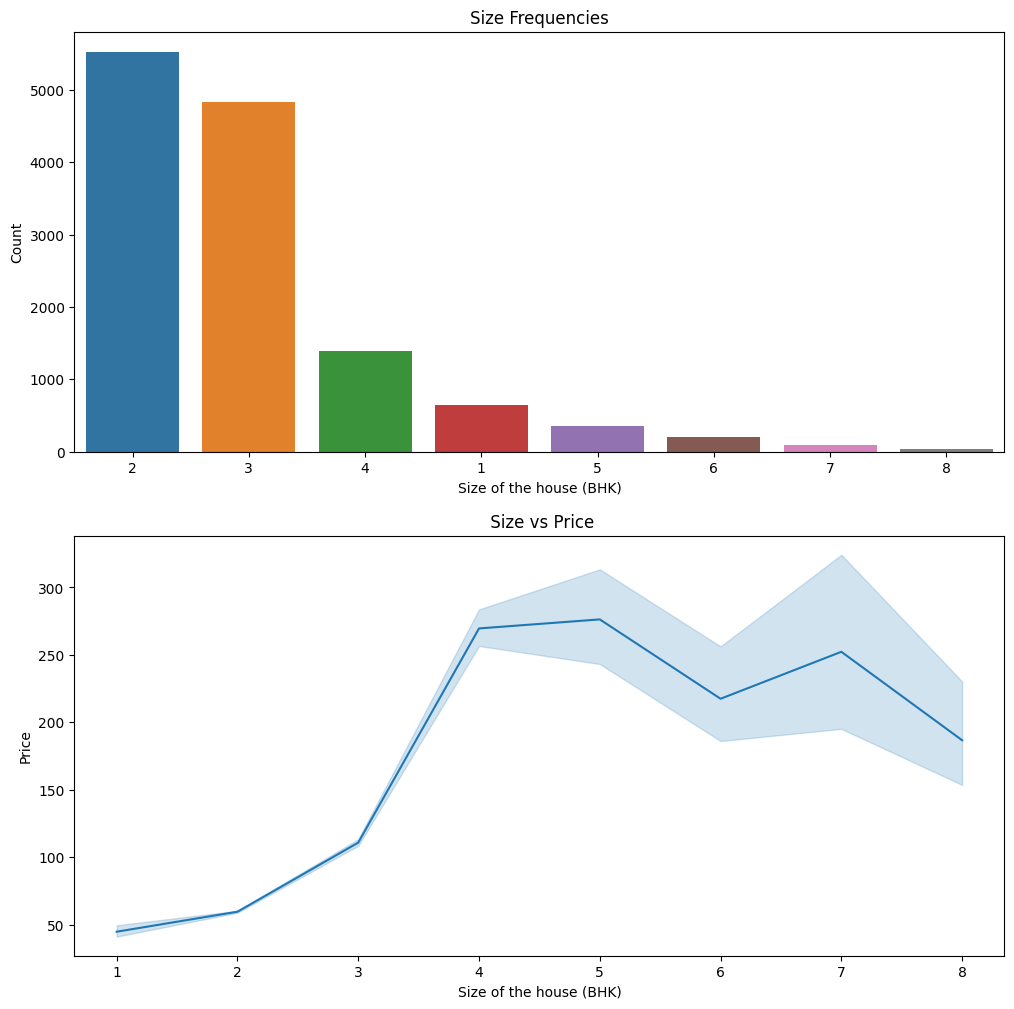

In [74]:
plt.subplots(2,1,figsize=(12,12))

plt.subplot(2,1,1)
sns.countplot(x=df_3['size'],order=df_3['size'].value_counts().index)
plt.xlabel("Size of the house (BHK)")
plt.ylabel("Count")
plt.title("Size Frequencies")

plt.subplot(2,1,2)
sns.lineplot(x=df_3['size'],y=df_3['price'])
plt.xlabel("Size of the house (BHK)")
plt.ylabel("Price")
plt.title(" Size vs Price")

#### Inference from Size
    -The price of the house increase as the size increases till the value is of 5 but after that there is fluctuations
     in the points due to the imbalance in the data for those points.
    -From the countplot we can conclude the data are less in those areas so they will be removed during the outlier 
     handling process.

### 4 Bath

In [64]:
df_3['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 12., 10.])

In [65]:
df_3['bath'] = df_3['bath'].astype(int)

In [66]:
df_3['bath'].value_counts()

2     6908
3     3285
4     1225
1      788
5      523
6      265
7       98
8       54
9       13
12       3
10       3
Name: bath, dtype: int64

In [67]:
(len(df_3[df_3['bath']>7])/len(df_3))*100

0.5545005696923662

    We can see bath greater than 7 is very few records(0.5%) in the entire dataset. So we can drop those values.

In [68]:
df_3 =  df_3[df_3['bath']<8]

Text(0.5, 1.0, ' Bath vs Price')

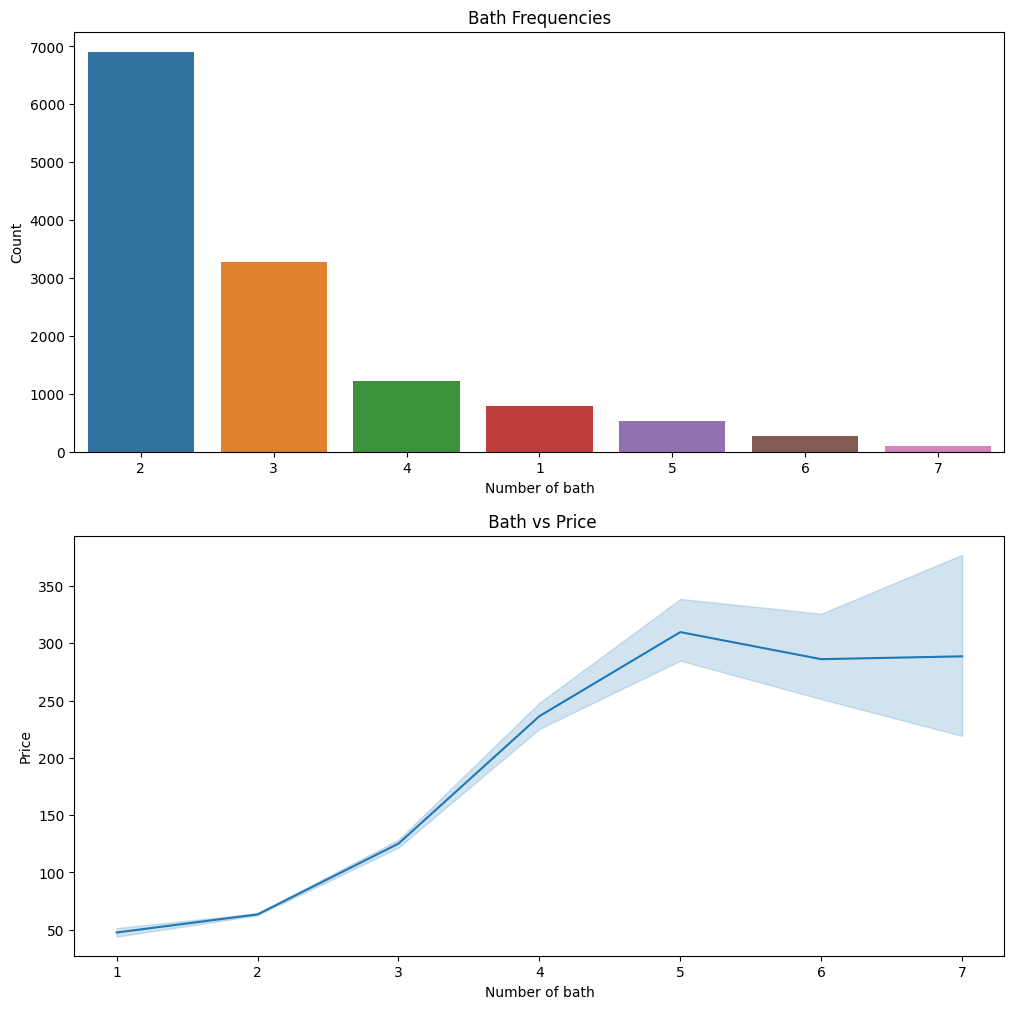

In [73]:
plt.subplots(2,1,figsize=(12,12))

plt.subplot(2,1,1)
sns.countplot(x=df_3['bath'],order=df_3['bath'].value_counts().index)
plt.xlabel("Number of bath")
plt.ylabel("Count")
plt.title("Bath Frequencies")

plt.subplot(2,1,2)
sns.lineplot(x=df_3['bath'],y=df_3['price'])
plt.xlabel("Number of bath")
plt.ylabel("Price")
plt.title(" Bath vs Price")

#### Inference from bath
    -The price of the house increase as the number of bath increases till the value is of 5 but after that there is 
     no major change. 
    -From the countplot we can conclude the data are less in those areas so they will be removed during the
     outlier handling process.

### 5 Balcony

In [75]:
df_3['balcony'].unique()

array([1., 3., 2., 0.])

In [76]:
df_3['balcony'] = df_3['balcony'].astype(int)

In [77]:
df_3['balcony'].value_counts()

2    5566
1    4881
3    1634
0    1011
Name: balcony, dtype: int64

Text(0, 0.5, 'Count')

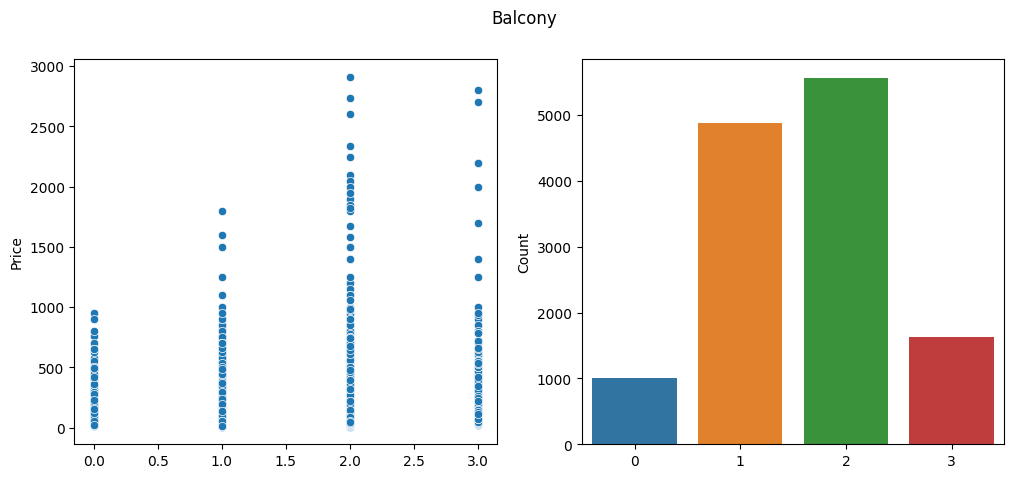

In [79]:
plt.subplots(1,2,figsize=(12,5))
plt.suptitle("Balcony")

plt.subplot(1,2,1)
sns.scatterplot(x=df_3['balcony'],y=df_3['price'])
plt.xlabel("")
plt.ylabel("Price")

plt.subplot(1,2,2)
sns.countplot(x=df_3['balcony'])
plt.xlabel("")
plt.ylabel("Count")

#### Inference from balcony    
    We can see when we have no balconies the price is always below 1000 but with a single balcony price is closer to 2000 
    and with 2 and 3 also values are in higher range. There is clear relation with target. 

### 6 Total Sqft

    Since the data type is not int/float there is some discrepancy in it. So lets find the errors using a func.

In [81]:
def totalSqft_error_checker(x):
    try:
        if float(x):
            return True
    except:
        return False

In [82]:
Total_Sqft_error = df_3[~df_3['total_sqft'].apply(totalSqft_error_checker)]
print("Total error values",len(Total_Sqft_error))

Total error values 188


In [83]:
print(list(Total_Sqft_error.iloc[0:188,-4]))

['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340', '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter', '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285', '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455', '884 - 1116', '850 - 1093', '547.34 - 827.31', '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800', '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards', '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '3630 - 3800', '1004 - 1204', '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882', '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards', '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315', '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648', '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500', '167Sq. Meter', '1076 - 1199', '381 - 535', '524 - 894', '540 - 670', '315Sq. Yards', '2725 - 3250', '888 - 1290', '660 - 700', '385 - 440', '770 - 

    Most of the error is because of the range value. Other errors we can drop from the table.

In [84]:
def totalSqft_error_solver(x):
    try:
        if float(x):
            return x
    except:
        if "-" in x:
            split_values = x.split('-')
            return float((float(split_values[0])+float(split_values[1]))/2)

In [85]:
df_3['total_sqft'] = df_3['total_sqft'].apply(totalSqft_error_solver)

In [86]:
Total_Sqft_error = df_3[~df_3['total_sqft'].apply(totalSqft_error_checker)]
print("Total error values",len(Total_Sqft_error))

Total error values 44


    By that method 144 errors are resolved remaining errors can be dropped

In [87]:
df_3 = df_3[df_3['total_sqft'].apply(totalSqft_error_checker)]

In [88]:
df_3['total_sqft'] = pd.to_numeric(df_3['total_sqft'])

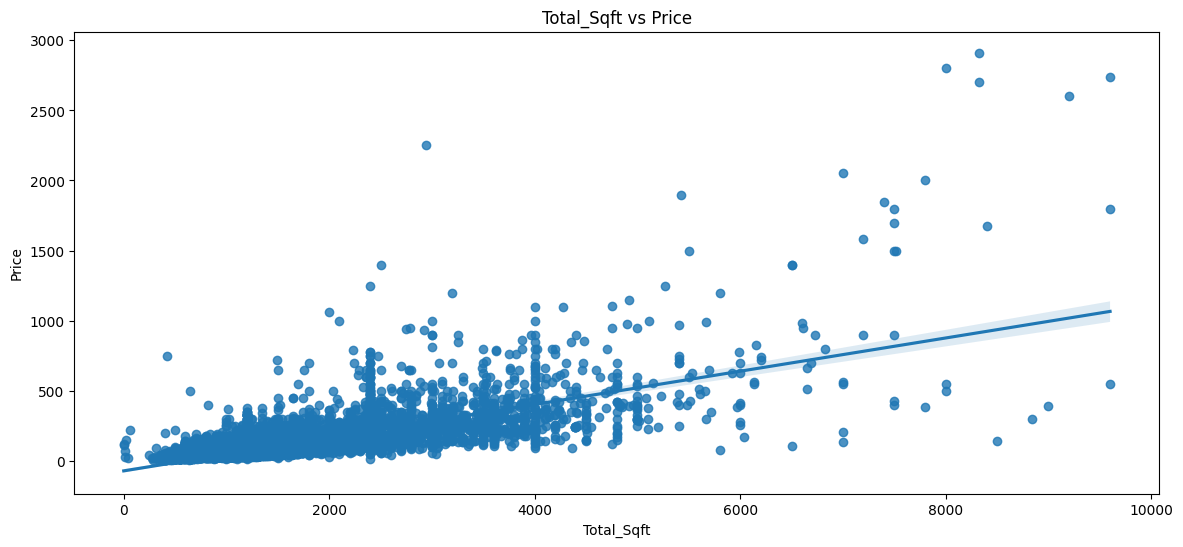

In [89]:
df_plt = df_3[df_3['total_sqft']<10000]
plt.figure(figsize=(14,6))
sns.regplot(x=df_plt['total_sqft'],y=df_plt['price'])
plt.xlabel("Total_Sqft")
plt.ylabel("Price")
plt.title("Total_Sqft vs Price")
plt.show()

#### Inference from total sqft
    There is a linear relationship between the price and the total_sqft of the house

### 7 Location

In [58]:
df_3['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [59]:
print(f"The number of unique values (before case conversion) in location is {len(df_3['location'].unique())}")

The number of unique values (before case conversion) in location is 1285


    Since it is a string data type due to case sensitive there might be some discrepancy to converting all the data 
    to a common case of lowercase

In [60]:
df_3['location'] = df_3['location'].str.lower()

In [61]:
print(f"The number of unique values (after case conversion) in location is {len(df_3['location'].unique())}")

The number of unique values (after case conversion) in location is 1275


In [62]:
df_3['location'] = df_3['location'].str.strip()

In [63]:
print(f"The number of unique values (after strip) in location is {len(df_3['location'].unique())}")

The number of unique values (after strip) in location is 1263


In [64]:
df_3['location'] = df_3['location'].str.replace(" ","")

In [65]:
print(f"The number of unique values (after trim) in location is {len(df_3['location'].unique())}")

The number of unique values (after trim) in location is 1249


In [66]:
loc_df = df_3.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_df

location
whitefield                       533
sarjapurroad                     392
electroniccity                   303
kanakpuraroad                    264
thanisandra                      235
                                ... 
kathriguppeivphase                 1
keerthilayout                      1
kenchanehallirrnagar               1
kengerisatellitetown(bdasite)      1
zuzuvadi                           1
Name: location, Length: 1249, dtype: int64

In [67]:
len(loc_df)

1249

In [68]:
len(loc_df[loc_df<10])

994

  
    Dimension reduction - Most of the data are repeated less than 10 times so while one hot encoding it leads to huge size 
    of the dataset so lets combine these values to a common group "Others"

In [69]:
loc_list_others = list(loc_df[loc_df<10].index)

In [70]:
df_3['location'] = df_3['location'].apply(lambda x : 'others' if x in loc_list_others else x)

    1200+ Categories are now reduced to 250+ categories which will simply the alogirthm to avoid overfitting and reduces the overall datasize sparse values

In [71]:
len(df_3['location'].unique())

256

## Feature Engineering

In [72]:
df_4 = df_3.copy()

    We can create a new column based on the price an total_sqft features

In [73]:
df_4['price/sqft'] = round(df_4['price']*100000/df_4['total_sqft'],2)
df_4.head()

,availability,location,size,total_sqft,bath,balcony,price,price/sqft
0,Available Later,electroniccityphaseii,2,1056.0,2.0,1.0,39.07,3699.81
1,Ready To Move,chikkatirupathi,4,2600.0,5.0,3.0,120.00,4615.38
2,Ready To Move,uttarahalli,3,1440.0,2.0,3.0,62.00,4305.56
3,Ready To Move,lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.89
4,Ready To Move,kothanur,2,1200.0,2.0,1.0,51.00,4250.00


In [74]:
df_4.shape

(13121, 8)

### Outlier Handling

In [75]:
df_5 = df_4.copy()

In [76]:
df_5.describe()

,size,total_sqft,bath,balcony,price,price/sqft
count,13121.00000,13121.000000,13121.000000,13121.000000,13121.000000,1.312100e+04
mean,2.75543,1545.569296,2.647664,1.600412,111.079561,7.886912e+03
std,1.09941,1174.308109,1.165241,0.803288,145.127964,1.070450e+05
min,1.00000,1.000000,1.000000,0.000000,8.000000,2.678300e+02
25%,2.00000,1100.000000,2.000000,1.000000,50.000000,4.263010e+03
50%,3.00000,1274.000000,2.000000,2.000000,71.000000,5.422490e+03
75%,3.00000,1665.000000,3.000000,2.000000,120.000000,7.277630e+03
max,8.00000,52272.000000,12.000000,3.000000,2912.000000,1.200000e+07


In [77]:
cols = ['size','bath','balcony']

### Outlier Visualization (Before Handling)

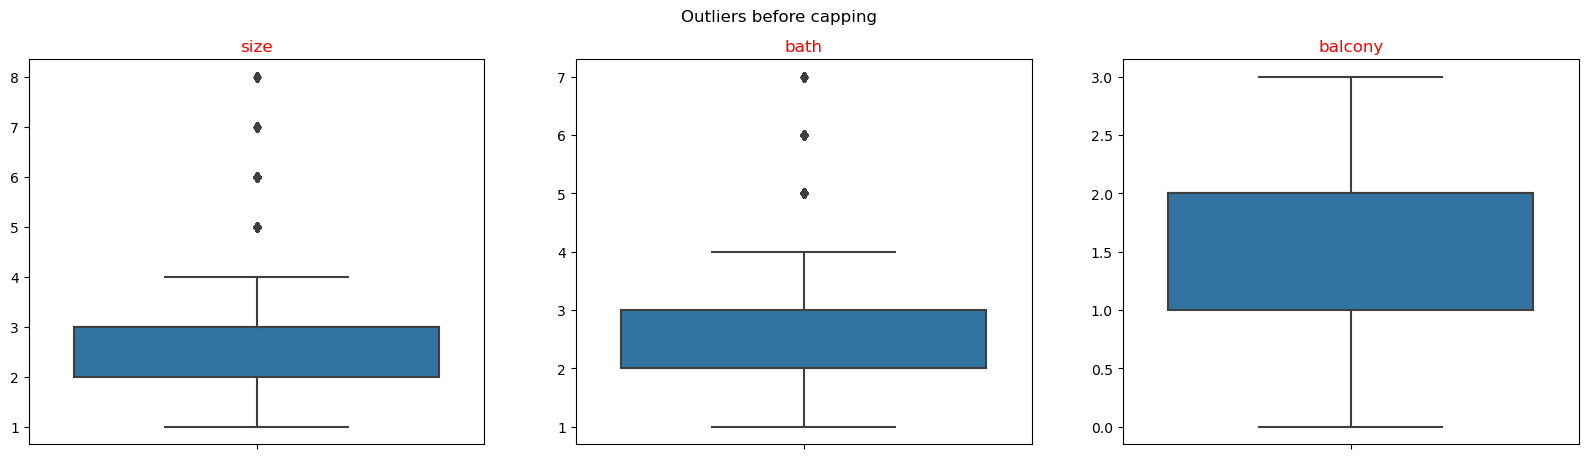

In [88]:
# Visualising the outlier before the handling

plt.subplots(1,3,figsize=(20,5))

for i,j in enumerate(cols):
    plt.subplot(1,3,i+1)
    sns.boxplot( y = df_5[j])
    plt.title(j,color = 'r')
    plt.ylabel("")

plt.suptitle('Outliers before capping')
plt.show()

#### Size and Bath fields

In [89]:
# Removing the outlier in size

df_5 = df_5[df_5['size']<5]

In [90]:
# Removing the outlier in bath

df_5 = df_5[df_5['bath']<5]


    Bath cannot be more than than number of bedrooms. 
    Lets see the number of bedrooms is 5 so the number of baths can be 5 with some tolerance of 1 that is 6

Text(0.5, 1.0, 'Size vs Bath Analysis')

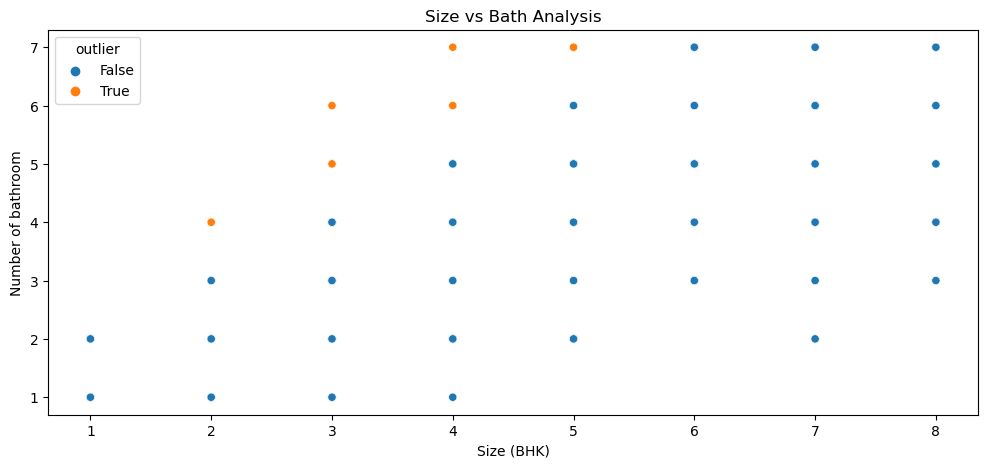

In [91]:
size_bath = df_3[['size','bath']]
size_bath['outlier'] = size_bath.apply(lambda x : (x['bath']>x['size']+1),1,0)
plt.figure(figsize=(12,5))
sns.scatterplot(size_bath['size'],size_bath['bath'],hue=size_bath['outlier'])
plt.xlabel("Size (BHK)")
plt.ylabel("Number of bathroom")
plt.title('Size vs Bath Analysis')

In [78]:
df_5 = df_5[df_5['bath']<=df_5['size']+1]

In [79]:
df_5.shape

(12954, 8)

### Outlier Visualization (After Handling)

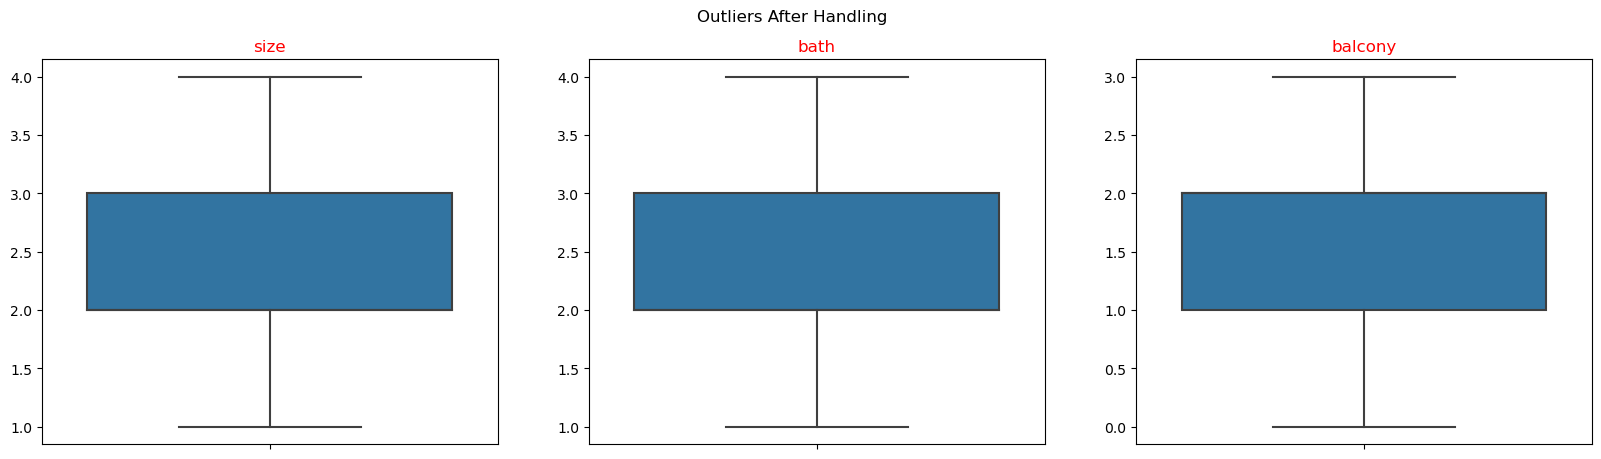

In [94]:
# Visualising the outlier after the handling

plt.subplots(1,3,figsize=(20,5))

for i,j in enumerate(cols):
    plt.subplot(1,3,i+1)
    sns.boxplot( y = df_5[j])
    plt.title(j,color = 'r')
    plt.ylabel("")

plt.suptitle('Outliers After Handling')
plt.show()

#### Price/sqft

In [95]:
Q1 = df_5['price/sqft'].quantile(0.25)
Q3 = df_5['price/sqft'].quantile(0.75)
IQR = Q3-Q1
Upper_fence = (Q3+(1.5*IQR))
Lower_fence = (Q1-(1.5*IQR))
print(f"The range of price/sqft should be between {int(Lower_fence)} and {int(Upper_fence)}")

The range of price/sqft should be between 306 and 10687


In [96]:
df_5 = df_5[(df_5['price/sqft']>306) & (df_5['price/sqft']<10687)]

In [97]:
df_5.shape

(10995, 8)

#### total_sqft

In [98]:
Q1 = df_5['total_sqft'].quantile(0.25)
Q3 = df_5['total_sqft'].quantile(0.75)
IQR = Q3-Q1
Upper_fence = (Q3+(1.5*IQR))
Lower_fence = (Q1-(1.5*IQR))
print(f"The range of total_sqft should be between {int(Lower_fence)} and {int(Upper_fence)}")

The range of total_sqft should be between 384 and 2278


In [99]:
df_5 = df_5[(df_5['total_sqft']>384) & (df_5['total_sqft']<2278)]

In [100]:
df_5.shape

(10329, 8)

In [101]:
df_5.describe()

,size,total_sqft,bath,balcony,price,price/sqft
count,10329.000000,10329.000000,10329.000000,10329.000000,10329.000000,10329.000000
mean,2.396553,1286.746113,2.251041,1.567238,69.190534,5254.729928
std,0.635549,344.911962,0.620310,0.767612,33.094529,1614.731147
min,1.000000,395.000000,1.000000,0.000000,9.000000,1166.670000
25%,2.000000,1080.000000,2.000000,1.000000,45.790000,4062.500000
50%,2.000000,1230.000000,2.000000,2.000000,61.000000,5000.000000
75%,3.000000,1500.000000,3.000000,2.000000,85.000000,6190.480000
max,4.000000,2275.000000,4.000000,3.000000,235.000000,10681.820000


### Distribution analysis

#### Skewness and Kurtosis

In [102]:
df_6 = df_5.drop(['price'],axis=1)

distribution =pd.DataFrame()
distribution.index = df_6.skew().index
distribution['Skewness'] = df_6.skew().values
distribution['Kurtosis'] = df_6.kurt().values

distribution

,Skewness,Kurtosis
size,0.052421,-0.219507
total_sqft,0.298129,0.187587
bath,0.552870,0.640490
balcony,0.038957,-0.404018
price/sqft,0.782414,0.478260


    The values are between the range of -2 to +2 in our dataset. So we can say our data is normally distributed.

#### Histogram

array([[<AxesSubplot:title={'center':'size'}>,
        <AxesSubplot:title={'center':'total_sqft'}>],
       [<AxesSubplot:title={'center':'bath'}>,
        <AxesSubplot:title={'center':'balcony'}>],
       [<AxesSubplot:title={'center':'price/sqft'}>, <AxesSubplot:>]],
      dtype=object)

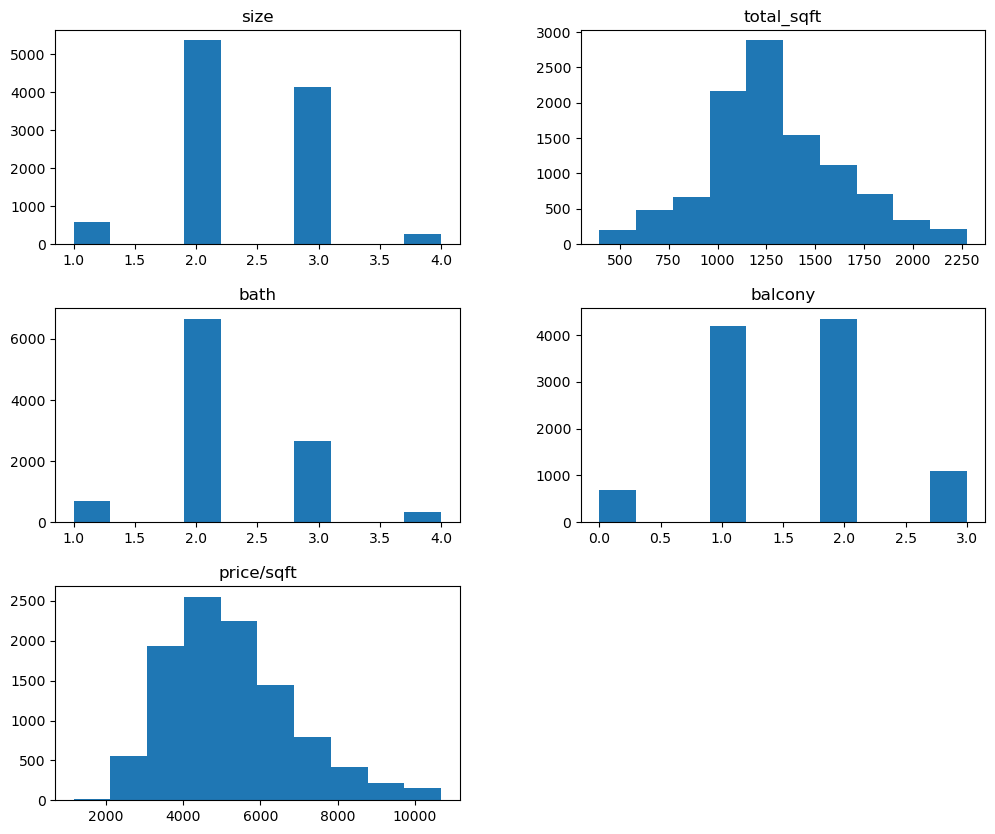

In [103]:
df_6.hist(figsize=(12,10),grid=False)

### Checking for Multi-Collinearity

In [104]:
df_7 = df_6.copy()

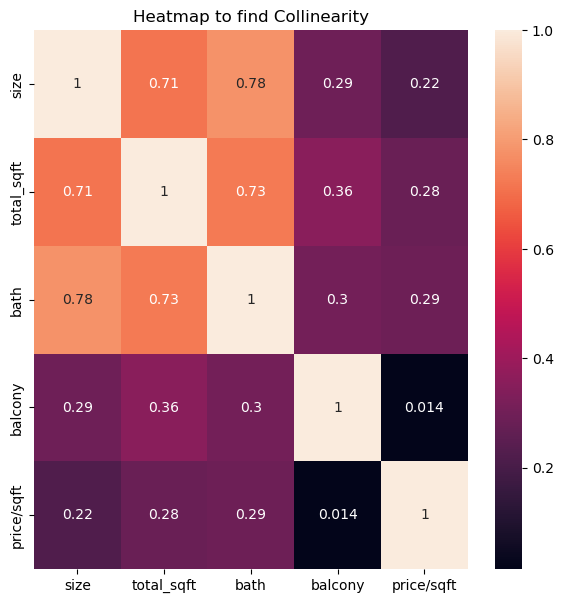

In [105]:
plt.figure(figsize=(7,7))
sns.heatmap(df_7.corr(),annot=True)
plt.title('Heatmap to find Collinearity')
plt.show()

#### Inferences on Multi Collinearity
    We do not have any columns with high positive or negative multi-collinearity in our dataset



### One hot encoding

In [106]:
df_8 = df_5.copy()

In [107]:
df_8 = pd.get_dummies(df_8,columns=['location'] ,prefix="",prefix_sep="",drop_first=True)

In [108]:
df_8['availability'] = df_8['availability'].map({'Available Later':0,'Ready To Move':1})

In [109]:
df_8.head()

,availability,size,total_sqft,bath,balcony,price,price/sqft,1stblockkoramangala,1stphasejpnagar,2ndphasejudiciallayout,5thblockhbrlayout,5thphasejpnagar,6thphasejpnagar,7thphasejpnagar,8thphasejpnagar,9thphasejpnagar,abbigere,aecslayout,akshayanagar,ambalipura,ambedkarnagar,amruthahalli,anandapura,ananthnagar,anekal,anjanapura,ardendale,arekere,ashwathnagar,attibele,babusapalaya,badavalanagar,balagere,banagirinagar,banashankari,banashankaristageii,banashankaristageiii,banashankaristagev,banashankaristagevi,banaswadi,banjaralayout,bannerghatta,bannerghattaroad,basapura,basavangudi,basaveshwaranagar,battarahalli,begur,begurroad,bellandur,bemllayout,bensontown,bharathinagar,bhoganhalli,billekahalli,binnypete,bisuvanahalli,bommanahalli,bommasandra,bommasandraindustrialarea,bommenahalli,brookefield,btm2ndstage,btmlayout,budigere,chamrajpet,chandapura,channasandra,chikkabanavar,chikkalasandra,chikkatirupathi,choodasandra,cooketown,coxtown,cvramannagar,dairycircle,dasanapura,dasarahalli,devanahalli,devarachikkanahalli,doddaballapur,doddakallasandra,doddanekkundi,doddathoguru,dodsworthlayout,domlur,dommasandra,electroniccity,electroniccityphaseii,electronicscityphase1,epipzone,frazertown,ganganagar,garudacharpalya,girinagar,gmpalaya,gollarapalyahosahalli,gottigere,greenglenlayout,gubbalala,gunjur,gunjurpalya,hal2ndstage,haralurroad,harlur,hbrlayout,hebbal,hebbalkempapura,hegdenagar,hennur,hennurroad,hoodi,horamavuagara,horamavubanaswadi,hormavu,hosakerehalli,hosaroad,hoskote,hosurroad,hrbrlayout,hsrlayout,hulimavu,iblurvillage,indiranagar,isrolayout,itpl,jakkur,jalahalli,jalahallieast,jigani,jpnagar,judiciallayout,kadubeesanahalli,kadugodi,kaggadasapura,kaggalipura,kaikondrahalli,kalenaagrahara,kalkere,kalyannagar,kambipura,kammanahalli,kammasandra,kanakapura,kanakpuraroad,kannamangala,karunanagar,kasavanhalli,kasturinagar,kathriguppe,kavalbyrasandra,kenchenahalli,kengeri,kengerisatellitetown,kereguddadahalli,kodichikkanahalli,kodigehaali,kodigehalli,kodihalli,kogilu,konanakunte,koramangala,kothannur,kothanur,krpuram,kudlu,kudlugate,kumaraswamilayout,kundalahalli,laggere,lakshminarayanapura,lbshastrinagar,lingadheeranahalli,magadiroad,mahadevpura,mahalakshmilayout,mallasandra,malleshpalya,malleshwaram,marathahalli,margondanahalli,marsur,micolayout,munnekollal,murugeshpalya,mysoreroad,nagadevanahalli,naganathapura,nagappareddylayout,nagarbhavi,nagasandra,nagavara,nagavarapalya,narayanapura,neeladrinagar,nehrunagar,ngrlayout,nrilayout,oldairportroad,oldmadrasroad,ombrlayout,others,padmanabhanagar,pailayout,panathur,parappanaagrahara,pattanduragrahara,poornapragnalayout,prithvilayout,r.t.nagar,rachenahalli,rajajinagar,rajarajeshwarinagar,rajivnagar,ramagondanahalli,ramamurthynagar,rayasandra,sahakaranagar,sanjaynagar,sarakkinagar,sarjapur,sarjapura-attibeleroad,sarjapurroad,sector1hsrlayout,sector2hsrlayout,sector7hsrlayout,seegehalli,shampura,shivajinagar,singasandra,somasundarapalya,sompura,sonnenahalli,subramanyapura,sultanpalaya,talaghattapura,tcpalaya,thanisandra,thigalarapalya,thubarahalli,thyagarajanagar,tindlu,tumkurroad,ulsoor,uttarahalli,varthur,varthurroad,vasanthapura,vidyaranyapura,vijayanagar,vishveshwaryalayout,vishwapriyalayout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahankanewtown,yelenahalli,yeshwanthpur
0,0,2,1056.0,2,1,39.07,3699.81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,1440.0,2,3,62.00,4305.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Dependant and Independant dataset

In [110]:
X = df_8.drop(['price'],axis=1)
Y = df_8['price']

In [111]:
X.shape

(10329, 258)

In [112]:
Y.shape

(10329,)

In [113]:
X.head()

,availability,size,total_sqft,bath,balcony,price/sqft,1stblockkoramangala,1stphasejpnagar,2ndphasejudiciallayout,5thblockhbrlayout,5thphasejpnagar,6thphasejpnagar,7thphasejpnagar,8thphasejpnagar,9thphasejpnagar,abbigere,aecslayout,akshayanagar,ambalipura,ambedkarnagar,amruthahalli,anandapura,ananthnagar,anekal,anjanapura,ardendale,arekere,ashwathnagar,attibele,babusapalaya,badavalanagar,balagere,banagirinagar,banashankari,banashankaristageii,banashankaristageiii,banashankaristagev,banashankaristagevi,banaswadi,banjaralayout,bannerghatta,bannerghattaroad,basapura,basavangudi,basaveshwaranagar,battarahalli,begur,begurroad,bellandur,bemllayout,bensontown,bharathinagar,bhoganhalli,billekahalli,binnypete,bisuvanahalli,bommanahalli,bommasandra,bommasandraindustrialarea,bommenahalli,brookefield,btm2ndstage,btmlayout,budigere,chamrajpet,chandapura,channasandra,chikkabanavar,chikkalasandra,chikkatirupathi,choodasandra,cooketown,coxtown,cvramannagar,dairycircle,dasanapura,dasarahalli,devanahalli,devarachikkanahalli,doddaballapur,doddakallasandra,doddanekkundi,doddathoguru,dodsworthlayout,domlur,dommasandra,electroniccity,electroniccityphaseii,electronicscityphase1,epipzone,frazertown,ganganagar,garudacharpalya,girinagar,gmpalaya,gollarapalyahosahalli,gottigere,greenglenlayout,gubbalala,gunjur,gunjurpalya,hal2ndstage,haralurroad,harlur,hbrlayout,hebbal,hebbalkempapura,hegdenagar,hennur,hennurroad,hoodi,horamavuagara,horamavubanaswadi,hormavu,hosakerehalli,hosaroad,hoskote,hosurroad,hrbrlayout,hsrlayout,hulimavu,iblurvillage,indiranagar,isrolayout,itpl,jakkur,jalahalli,jalahallieast,jigani,jpnagar,judiciallayout,kadubeesanahalli,kadugodi,kaggadasapura,kaggalipura,kaikondrahalli,kalenaagrahara,kalkere,kalyannagar,kambipura,kammanahalli,kammasandra,kanakapura,kanakpuraroad,kannamangala,karunanagar,kasavanhalli,kasturinagar,kathriguppe,kavalbyrasandra,kenchenahalli,kengeri,kengerisatellitetown,kereguddadahalli,kodichikkanahalli,kodigehaali,kodigehalli,kodihalli,kogilu,konanakunte,koramangala,kothannur,kothanur,krpuram,kudlu,kudlugate,kumaraswamilayout,kundalahalli,laggere,lakshminarayanapura,lbshastrinagar,lingadheeranahalli,magadiroad,mahadevpura,mahalakshmilayout,mallasandra,malleshpalya,malleshwaram,marathahalli,margondanahalli,marsur,micolayout,munnekollal,murugeshpalya,mysoreroad,nagadevanahalli,naganathapura,nagappareddylayout,nagarbhavi,nagasandra,nagavara,nagavarapalya,narayanapura,neeladrinagar,nehrunagar,ngrlayout,nrilayout,oldairportroad,oldmadrasroad,ombrlayout,others,padmanabhanagar,pailayout,panathur,parappanaagrahara,pattanduragrahara,poornapragnalayout,prithvilayout,r.t.nagar,rachenahalli,rajajinagar,rajarajeshwarinagar,rajivnagar,ramagondanahalli,ramamurthynagar,rayasandra,sahakaranagar,sanjaynagar,sarakkinagar,sarjapur,sarjapura-attibeleroad,sarjapurroad,sector1hsrlayout,sector2hsrlayout,sector7hsrlayout,seegehalli,shampura,shivajinagar,singasandra,somasundarapalya,sompura,sonnenahalli,subramanyapura,sultanpalaya,talaghattapura,tcpalaya,thanisandra,thigalarapalya,thubarahalli,thyagarajanagar,tindlu,tumkurroad,ulsoor,uttarahalli,varthur,varthurroad,vasanthapura,vidyaranyapura,vijayanagar,vishveshwaryalayout,vishwapriyalayout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahankanewtown,yelenahalli,yeshwanthpur
0,0,2,1056.0,2,1,3699.81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,1440.0,2,3,4305.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Feature Selection

In [114]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression

In [115]:
feature_kbest = SelectKBest(score_func=mutual_info_regression)

In [116]:
feature_kbest.fit(X,Y)

SelectKBest(score_func=<function mutual_info_regression at 0x00000267C18FE550>)

In [117]:
Feature_score = pd.DataFrame()

In [118]:
Feature_score["Column"] = X.columns
Feature_score["Mutual_Score"] = feature_kbest.scores_

In [119]:
Feature_Sorted = Feature_score.sort_values(by='Mutual_Score',ascending=False,ignore_index=True)
Feature_Sorted

,Column,Mutual_Score
0,price/sqft,1.237098
1,total_sqft,0.872674
2,bath,0.274993
3,size,0.262749
4,balcony,0.078963
5,availability,0.078386
6,chandapura,0.024185
7,yeshwanthpur,0.021646
8,ngrlayout,0.019365
9,parappanaagrahara,0.017866


In [120]:
Percentage = [(i/sum(Feature_Sorted['Mutual_Score']))*100 for i in Feature_Sorted['Mutual_Score']]
Cum_List = []
a= 0
for i in Percentage:
    Cum_List.append(a+i)
    a=a+i

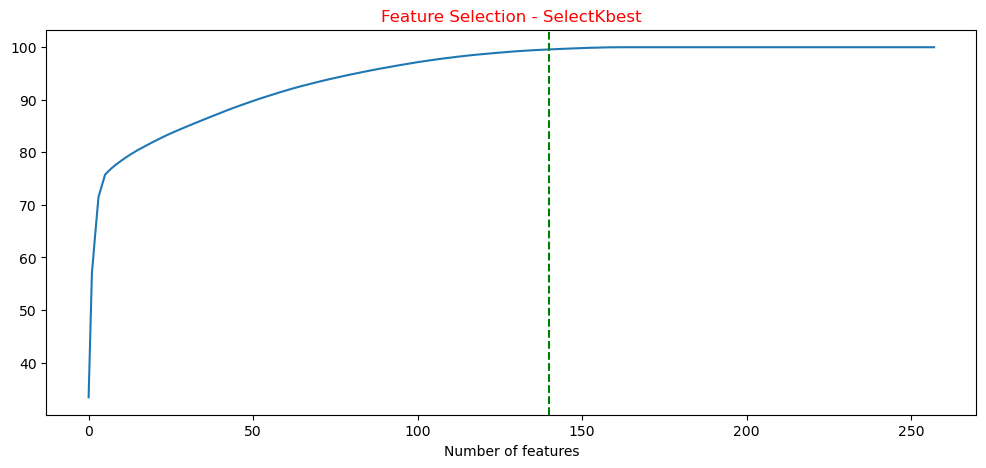

In [121]:
plt.figure(figsize=(12,5))
graph = sns.lineplot(Feature_Sorted.index,Cum_List)
graph.axvline(140,ls="--",color='g')
plt.title("Feature Selection - SelectKbest",color='r')
plt.xlabel('Number of features')
plt.show()

### Inferences from Feature selection

   We can see that **Top 140 fields** have considerable amount of mutual scores rather than Zero(Approx).
    So we can chose those field alone for our model.

In [122]:
Unwanted_Features = list(Feature_Sorted['Column'][141:])

In [123]:
X_feature = X.copy()

In [124]:
X_feature.drop(columns=Unwanted_Features,axis=1,inplace=True)

In [125]:
X_feature.shape

(10329, 141)

###  Train test split

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_Model , Y_train , Y_Model = train_test_split(X_feature,Y,test_size=0.3,random_state=10)

In [128]:
X_test, X_validate , Y_test , Y_validate = train_test_split(X_Model,Y_Model,test_size=0.5,random_state=10)

In [129]:
Split_data = pd.DataFrame()

In [130]:
Split_data['Data'] = ['Train','Validate','Test']

In [131]:
Split_data['Size'] = [X_train.shape[0],X_validate.shape[0],X_test.shape[0]]

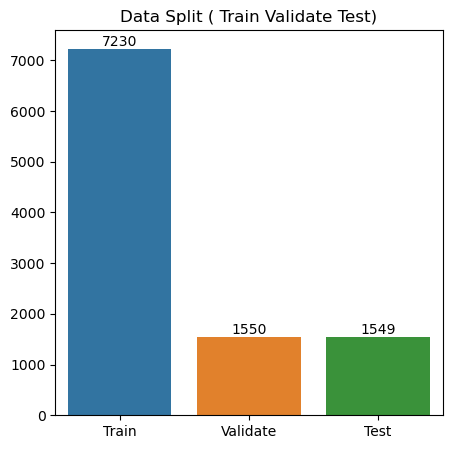

In [132]:
plt.figure(figsize=(5,5))
ax = sns.barplot(data=Split_data,x='Data',y='Size')
ax.bar_label(ax.containers[0])
plt.title("Data Split ( Train Validate Test)")
plt.xlabel("")
plt.ylabel("")
plt.show()

### Scaling the data

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler().fit(X_train)

In [135]:
X_Scale_train = scaler.transform(X_train)

In [136]:
X_train = pd.DataFrame(X_Scale_train,columns=X_feature.columns)
X_train.head()

,availability,size,total_sqft,bath,balcony,price/sqft,1stphasejpnagar,7thphasejpnagar,8thphasejpnagar,9thphasejpnagar,abbigere,aecslayout,akshayanagar,ambedkarnagar,amruthahalli,anandapura,ananthnagar,anekal,ashwathnagar,attibele,balagere,banashankaristageiii,banjaralayout,bannerghatta,bannerghattaroad,basapura,basavangudi,basaveshwaranagar,battarahalli,begur,begurroad,bellandur,bemllayout,bensontown,bhoganhalli,bisuvanahalli,budigere,chamrajpet,chandapura,channasandra,chikkabanavar,chikkalasandra,chikkatirupathi,choodasandra,cvramannagar,dasarahalli,devanahalli,doddaballapur,doddathoguru,dodsworthlayout,domlur,dommasandra,electroniccity,electroniccityphaseii,electronicscityphase1,frazertown,ganganagar,garudacharpalya,gmpalaya,gunjurpalya,hal2ndstage,haralurroad,hebbal,hennurroad,hoodi,horamavuagara,horamavubanaswadi,hosakerehalli,hrbrlayout,hsrlayout,itpl,jakkur,jalahalli,judiciallayout,kadugodi,kaggadasapura,kaggalipura,kambipura,kammasandra,kanakapura,kanakpuraroad,kannamangala,karunanagar,kasavanhalli,kathriguppe,kavalbyrasandra,kenchenahalli,kengeri,kengerisatellitetown,kereguddadahalli,kodichikkanahalli,kodigehaali,kodihalli,kudlu,kundalahalli,laggere,lakshminarayanapura,lbshastrinagar,lingadheeranahalli,mallasandra,malleshpalya,malleshwaram,micolayout,nagarbhavi,nagasandra,nagavara,nagavarapalya,ngrlayout,oldmadrasroad,others,parappanaagrahara,poornapragnalayout,prithvilayout,rachenahalli,rajarajeshwarinagar,rajivnagar,ramamurthynagar,sahakaranagar,sanjaynagar,sarakkinagar,sarjapura-attibeleroad,sarjapurroad,sector7hsrlayout,singasandra,sompura,sultanpalaya,talaghattapura,tcpalaya,thanisandra,thigalarapalya,thyagarajanagar,ulsoor,uttarahalli,vasanthapura,vidyaranyapura,vishveshwaryalayout,vittasandra,whitefield,yelahankanewtown,yelenahalli,yeshwanthpur
0,0.537801,-2.187760,-2.204734,-2.010738,-2.044002,-0.189264,-0.037216,-0.119027,-0.067714,-0.049958,-0.044047,-0.031131,-0.07825,-0.049958,-0.040774,-0.047095,-0.058905,-0.058905,-0.037216,-0.060076,-0.066676,-0.039035,-0.02882,-0.02882,-0.112272,-0.02882,-0.040774,-0.031131,-0.040774,-0.037216,-0.090706,-0.090706,-0.02882,-0.02882,-0.07074,-0.073644,-0.062352,-0.02882,-0.095983,-0.057711,-0.023528,-0.052668,-0.026307,-0.047095,-0.06346,-0.039035,-0.055246,-0.016634,-0.053972,-0.026307,-0.042442,-0.031131,-0.172958,-0.115389,-0.096714,-0.039035,-0.02882,-0.042442,-0.026307,-0.033283,-0.011761,-0.116614,-0.104432,-0.112272,-0.086747,-0.065621,-0.052668,-0.035304,-0.037216,-0.06455,-0.033283,-0.074587,-0.062352,-0.026307,-0.049958,-0.075519,-0.044047,-0.048547,-0.048547,-0.057711,-0.161599,-0.037216,-0.026307,-0.083449,-0.042442,-0.045596,-0.040774,-0.075519,-0.058905,-0.040774,-0.048547,-0.033283,-0.020374,-0.056492,-0.06455,-0.016634,-0.057711,-0.02882,-0.049958,-0.042442,-0.033283,-0.039035,-0.026307,-0.052668,-0.011761,-0.02882,-0.039035,-0.037216,-0.069746,-0.46029,-0.040774,-0.042442,-0.02882,-0.06346,-0.123143,-0.031131,-0.075519,-0.052668,-0.033283,-0.020374,-0.031131,-0.174647,-0.033283,-0.044047,-0.033283,-0.033283,-0.060076,-0.074587,-0.142049,-0.068738,0.0,-0.033283,-0.135314,-0.037216,-0.051331,-0.016634,-0.061224,-0.202205,-0.058905,-0.039035,-0.07735
1,0.537801,-0.618719,-0.772142,-0.394907,-0.737474,-0.664807,-0.037216,-0.119027,-0.067714,-0.049958,-0.044047,-0.031131,-0.07825,-0.049958,-0.040774,-0.047095,-0.058905,-0.058905,-0.037216,-0.060076,-0.066676,-0.039035,-0.02882,-0.02882,-0.112272,-0.02882,-0.040774,-0.031131,-0.040774,-0.037216,-0.090706,-0.090706,-0.02882,-0.02882,-0.07074,-0.073644,-0.062352,-0.02882,-0.095983,-0.057711,-0.023528,-0.052668,-0.026307,-0.047095,-0.06346,-0.039035,-0.055246,-0.016634,-0.053972,-0.026307,-0.042442,-0.031131,-0.172958,-0.115389,-0.096714,-0.039035,-0.02882,-0.042442,-0.026307,-0.033283,-0.011761,-0.116614,-0.104432,-0.112272,-0.086747,-0.065621,-0.052668,-0.035304,-0.037216,-0.06455,-0.033283,-0.074587,-0.062352,-0.026307,-0.049958,-0.075519,-0.044047,-0.048547,-0.048547,-0.057711,-0.161599,-0.037216,-0.026307,-0.

In [137]:
X_Scale_validate = scaler.transform(X_validate)

In [138]:
X_validate = pd.DataFrame(X_Scale_validate,columns=X_feature.columns)
X_validate.shape

(1550, 141)

In [139]:
X_Scale_test = scaler.transform(X_test)

In [140]:
X_test = pd.DataFrame(X_Scale_test,columns=X_feature.columns)
X_test.shape

(1549, 141)

### Model Building

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [142]:
LR = LinearRegression()
KNN = KNeighborsRegressor()
svr = SVR()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
light = LGBMRegressor()
ada = AdaBoostRegressor()
xgb =XGBRegressor()
gb = GradientBoostingRegressor()

In [143]:
ML_model = [LR,KNN,svr,rf,dt,light,ada,xgb,gb]

### Model Evaluation

In [144]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [145]:
Model_name = ['Linear','KNN','SVM','Random Forest','Decision tree','LightGBM','Adaboost','XGBoost','Gradient Boost']
for model,name in zip(ML_model,Model_name):
    print("=========="*5)
    print("Performance of", name)
    print("-------"*5)
    
    alg=model.fit(X_train,Y_train)
    y_pred_train=alg.predict(X_train)
    y_pred_validate=alg.predict(X_validate)
    train_mse    = mse(Y_train,y_pred_train)
    validate_mse = mse(Y_validate,y_pred_validate)
    train_r2     = r2_score(Y_train,y_pred_train)
    validate_r2   = r2_score(Y_validate,y_pred_validate)

    # printing the metrics
    
    print(f"Training MSE           {train_mse:.2f}")
    print(f"Validation MSE         {validate_mse:.2f}",end='\n\n')

    print(f"Training R2 Score      {train_r2:.2f}")
    print(f"Validation R2 Score    {validate_r2:.2f}")
    
    print('\n')

Performance of Linear
-----------------------------------
Training MSE           32.90
Validation MSE         3534738099043327541248.00

Training R2 Score      0.97
Validation R2 Score    -3175901306953722880.00


Performance of KNN
-----------------------------------
Training MSE           80.77
Validation MSE         111.26

Training R2 Score      0.93
Validation R2 Score    0.90


Performance of SVM
-----------------------------------
Training MSE           262.42
Validation MSE         240.36

Training R2 Score      0.76
Validation R2 Score    0.78


Performance of Random Forest
-----------------------------------
Training MSE           0.11
Validation MSE         0.69

Training R2 Score      1.00
Validation R2 Score    1.00


Performance of Decision tree
-----------------------------------
Training MSE           0.00
Validation MSE         2.24

Training R2 Score      1.00
Validation R2 Score    1.00


Performance of LightGBM
-----------------------------------
Training MSE       

### Selection of top performing models

   From the accuracy we can conclude __Random Forest , Decision tree, LightGBM, XGBoost and Gradient Boost__ performs the best.
   So we can further improve these model by hyperparameter tuning than all the algorithms

### Hyperparameter tuning

In [145]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

### RandomizedSearchCV

In [146]:
lgbm_params = {'max_depth': np.arange(1,11),
               'n_estimators': [int(i) for i in np.linspace(100,1000,10)],
               'num_leaves' : np.arange(2,16,2),
               'min_child_samples' : np.arange(2,16,2),
               'min_child_weight': np.arange(0.001,0.011,0.001),
               'boosting_type' : ['gbdt','dart', 'goss','rf']}

In [147]:
rf_params = {'max_features':["auto", "sqrt", "log2"],
             'criterion' : ["squared_error", "absolute_error", "poisson"],
             'n_estimators': [int(i) for i in np.linspace(100,1000,10)],
             'min_samples_split':np.arange(2,16,2),
             'min_samples_leaf' :np.arange(2,16,2)}                           

In [148]:
dt_params  = {'max_features':["auto", "sqrt", "log2"],
              'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
              'splitter' : ["best", "random"],
              'max_depth' : np.arange(2,16,2),
              'min_samples_leaf' : np.arange(2,16,2),
              'min_samples_split': np.arange(2,16,2)}

In [149]:
xg_params = {'n_estimators': [int(i) for i in np.linspace(100,1000,10)],
             'max_depth' : np.arange(2,16,2),
             'booster':["gbtree","dart"]}

In [150]:
gd_params = { 'n_estimators': [int(i) for i in np.linspace(100,1000,10)],
              'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae'],
              'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'max_depth' : np.arange(1,16,2),
              'min_samples_leaf' : np.arange(1,16,2),
              'min_samples_split': np.arange(1,16,2)}

In [156]:
# LGBM

hyp_para = [("LGBM",LGBMRegressor(),lgbm_params)]
model_param ={}
for model, regressor, param in hyp_para:
    random = RandomizedSearchCV(estimator=regressor,
                               param_distributions=param,
                               n_iter=100,
                               random_state=10,
                               cv=3,
                               verbose=2,
                               n_jobs=-1)
    random.fit(X_train,Y_train)
    model_param[model] = random.best_params_

for i in model_param:
    print(f"---------------------{i}---------------------")
    print(model_param[i])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------------LGBM---------------------
{'num_leaves': 8, 'n_estimators': 1000, 'min_child_weight': 0.003, 'min_child_samples': 14, 'max_depth': 10, 'boosting_type': 'goss'}


In [158]:
# Random Forest

hyp_para = [("RandomForest",RandomForestRegressor(),rf_params)]
model_param ={}
for model, regressor, param in hyp_para:
    random = RandomizedSearchCV(estimator=regressor,
                               param_distributions=param,
                               n_iter=100,
                               random_state=10,
                               cv=3,
                               verbose=2,
                               n_jobs=-1)
    random.fit(X_train,Y_train)
    model_param[model] = random.best_params_

for i in model_param:
    print(f"---------------------{i}---------------------")
    print(model_param[i])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------------RandomForest---------------------
{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'criterion': 'squared_error'}


In [157]:
# Decision Tree

hyp_para =[("Decision Tree",DecisionTreeRegressor(),dt_params)]
model_param ={}
for model, regressor, param in hyp_para:
    random = RandomizedSearchCV(estimator=regressor,
                               param_distributions=param,
                               n_iter=100,
                               random_state=10,
                               cv=3,
                               verbose=2,
                               n_jobs=-1)
    random.fit(X_train,Y_train)
    model_param[model] = random.best_params_

for i in model_param:
    print(f"---------------------{i}---------------------")
    print(model_param[i])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------------Decision Tree---------------------
{'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'squared_error'}


In [166]:
# XGboost

hyp_para = [("XGBoost",XGBRegressor(),xg_params)]
model_param ={}
for model, regressor, param in hyp_para:
    random = RandomizedSearchCV(estimator=regressor,
                               param_distributions=param,
                               n_iter=100,
                               random_state=10,
                               cv=3,
                               verbose=2,
                               n_jobs=-1)
    random.fit(X_train,Y_train)
    model_param[model] = random.best_params_

for i in model_param:
    print(f"---------------------{i}---------------------")
    print(model_param[i])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
---------------------XGBoost---------------------
{'n_estimators': 1000, 'max_depth': 2, 'booster': 'gbtree'}


In [155]:
# Gradient boost

hyp_para =[("Gradient Boosting",GradientBoostingRegressor(),gd_params)]
model_param ={}
for model, regressor, param in hyp_para:
    random = RandomizedSearchCV(estimator=regressor,
                               param_distributions=param,
                               n_iter=100,
                               random_state=10,
                               cv=3,
                               verbose=2,
                               n_jobs=-1)
    random.fit(X_train,Y_train)
    model_param[model] = random.best_params_

for i in model_param:
    print(f"---------------------{i}---------------------")
    print(model_param[i])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
---------------------Gradient Boosting---------------------
{'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 9, 'loss': 'huber', 'criterion': 'friedman_mse'}


In [162]:
lgbm = LGBMRegressor(num_leaves = 8, n_estimators = 1000, min_child_weight = 0.003, min_child_samples = 14, max_depth = 10, boosting_type = 'goss')
rf = RandomForestRegressor(n_estimators= 400, min_samples_split=10, min_samples_leaf= 2, max_features= 'auto', criterion= 'squared_error')
dt = DecisionTreeRegressor(splitter= 'best', min_samples_split = 4, min_samples_leaf= 4, max_features= 'auto', max_depth= 10, criterion = 'squared_error')
xgb = XGBRegressor(n_estimators = 1000, max_depth = 2, booster = 'gbtree')
gd = GradientBoostingRegressor(min_samples_split= 3, min_samples_leaf = 3, max_depth = 9, loss = 'huber', criterion = 'friedman_mse')

In [163]:
ML_models = [lgbm,rf,dt,xgb,gb]

### Evaluation after tuning - Test dataset

In [164]:
Model_name = ['LightGBM','Random Forest','Decision tree','XGBoost','Gradient Boost']
for model,name in zip(ML_model,Model_name):
    print("=========="*5)
    print("Performance of", name)
    print("-------"*5)
    
    alg          = model.fit(X_train,Y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_test  = alg.predict(X_test)
    train_mse    = mse(Y_train,y_pred_train)
    test_mse     = mse(Y_test,y_pred_test)
    train_r2     = r2_score(Y_train,y_pred_train)
    test_r2      = r2_score(Y_test,y_pred_test)

    # printing the metrics
    
    print(f"Training MSE           {train_mse:.2f}")
    print(f"Test MSE               {test_mse:.2f}",end='\n\n')

    print(f"Training R2 Score      {train_r2:.2f}")
    print(f"Test R2 Score          {test_r2:.2f}")
    
    print('\n')

Performance of LightGBM
-----------------------------------
Training MSE           32.11
Test MSE               32.88

Training R2 Score      0.97
Test R2 Score          0.97


Performance of Random Forest
-----------------------------------
Training MSE           83.21
Test MSE               126.99

Training R2 Score      0.92
Test R2 Score          0.88


Performance of Decision tree
-----------------------------------
Training MSE           280.46
Test MSE               252.15

Training R2 Score      0.74
Test R2 Score          0.77


Performance of XGBoost
-----------------------------------
Training MSE           0.12
Test MSE               0.69

Training R2 Score      1.00
Test R2 Score          1.00


Performance of Gradient Boost
-----------------------------------
Training MSE           0.00
Test MSE               2.13

Training R2 Score      1.00
Test R2 Score          1.00




### Conclusion

    The results show that the XGBoost and Gradient Boost algorithms yields better results after tuning the hyperparamters 
    and evaluating with the R2 Score and MSE